## Keras Classification Breast Cancer Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

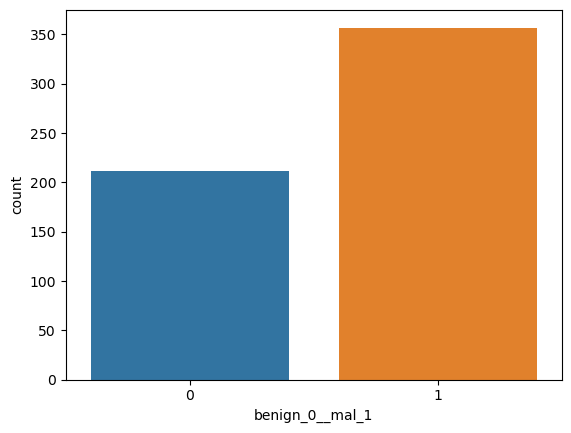

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

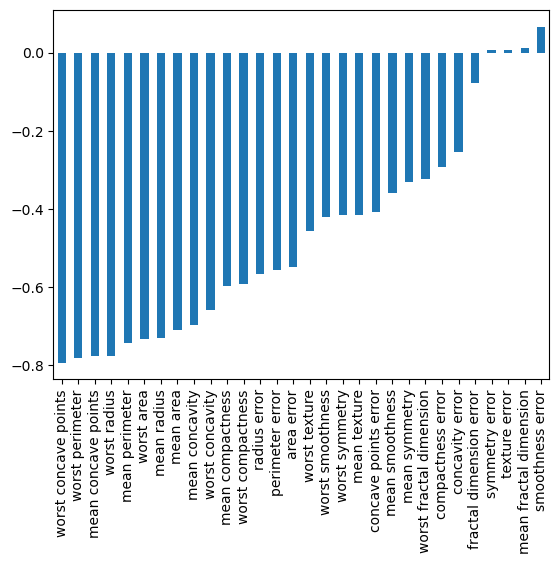

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# gives us the relation of the above feature with others

<AxesSubplot:>

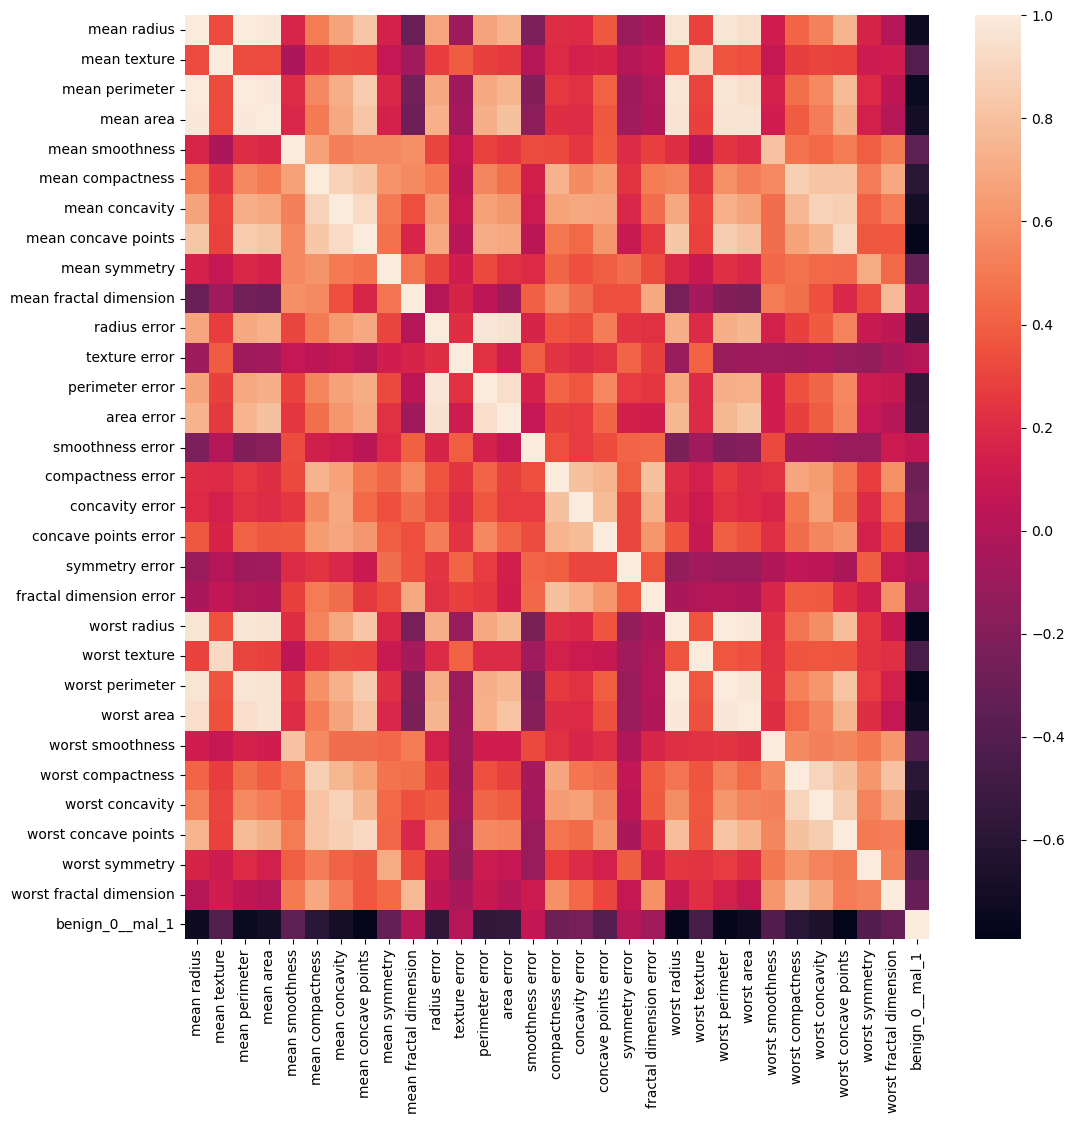

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.fit_transform(X_test)

In [24]:
from tensorflow.keras.models import Sequentialuential

In [25]:
# we will discuss the use of Dropout in this project
from tensorflow.keras.layers import Dense, Dropout

In [27]:
X_train.shape

(398, 30)

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# for binary classification the last activation will be sigmoid
# one neuron because we outputting 1 or 0
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train, y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 4s 33ms/step - loss: 0.6950 - val_loss: 0.6901
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6587 - val_loss: 0.6652
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6320 - val_loss: 0.6358
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6038 - val_loss: 0.6053
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5718 - val_loss: 0.5716
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5345 - val_loss: 0.5344
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4948 - val_loss: 0.4919
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4544 - val_loss: 0.4479
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4152 - val_loss: 0.4117
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3795 - val_loss: 0.3827
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0484 - val_loss: 0.2494
Epoch 84/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0480 - val_loss: 0.2450
Epoch 85/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0485 - val_loss: 0.2692
Epoch 86/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0467 - val_loss: 0.2585
Epoch 87/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0468 - val_loss: 0.2673
Epoch 88/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0463 - val_loss: 0.2697
Epoch 89/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0464 - val_loss: 0.2759
Epoch 90/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0467 - val_loss: 0.2708
Epoch 91/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.2525
Epoch 92/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0449 - val_loss: 0.2930


13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.3859
Epoch 165/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0306 - val_loss: 0.3408
Epoch 166/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.3722
Epoch 167/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - val_loss: 0.3480
Epoch 168/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.3732
Epoch 169/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - val_loss: 0.3248
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0316 - val_loss: 0.4265
Epoch 171/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.3247
Epoch 172/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.4174
Epoch 173/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.3214
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.4270
Epoch 246/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.4475
Epoch 247/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.5132
Epoch 248/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0269 - val_loss: 0.4144
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.4932
Epoch 250/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.4334
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.4621
Epoch 252/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.4915
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.4258
Epoch 254/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.5027
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.5415
Epoch 327/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.5698
Epoch 328/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.6187
Epoch 329/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.5289
Epoch 330/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0195 - val_loss: 0.5733
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.5697
Epoch 332/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.4577
Epoch 333/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.6795
Epoch 334/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.5651
Epoch 335/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.6251
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.6611
Epoch 408/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.6677
Epoch 409/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0151 - val_loss: 0.6831
Epoch 410/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.6804
Epoch 411/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.6456
Epoch 412/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.7034
Epoch 413/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.6260
Epoch 414/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.6673
Epoch 415/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 0.6749
Epoch 416/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.6459
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.7718
Epoch 489/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.7837
Epoch 490/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.7839
Epoch 491/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.7598
Epoch 492/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.7646
Epoch 493/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.8349
Epoch 494/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.7494
Epoch 495/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.7843
Epoch 496/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.7382
Epoch 497/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.8129
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.8516
Epoch 570/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.8848
Epoch 571/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.8475
Epoch 572/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.8797
Epoch 573/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.8445
Epoch 574/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.8445
Epoch 575/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.9076
Epoch 576/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.8503
Epoch 577/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.8871
Epoch 578/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.8645
Epoc

In [30]:
# finding losses
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

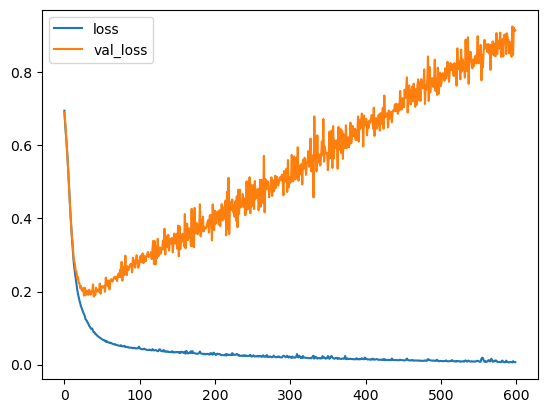

In [31]:
losses.plot()
# this is overfitting example, as validation loss increases
# as we are training for too many epochs

### Using Early Stopping to Reduce Error

In [34]:
# lets use tensorflow keras callbacks, to stop training before going out of hand
# lets re-define the model as fresh
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# for binary classification the last activation will be sigmoid
# one neuron because we outputting 1 or 0
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [38]:
# we are monitoring validation loss, mode will say that try to minimize it
# verbose = 1 so that it reports back, patience is 25 so that we wait 25 epochs, to check for any noise etc.

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=25)

In [39]:
model.fit(x=X_train, y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 19ms/step - loss: 0.6909 - val_loss: 0.6786
Epoch 2/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6678 - val_loss: 0.6560
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6342 - val_loss: 0.6191
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5931 - val_loss: 0.5793
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5558 - val_loss: 0.5385
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5137 - val_loss: 0.4961
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4706 - val_loss: 0.4519
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4281 - val_loss: 0.4115
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3846 - val_loss: 0.3724
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3459 - val_loss: 0.3401
Epoch 11

<AxesSubplot:>

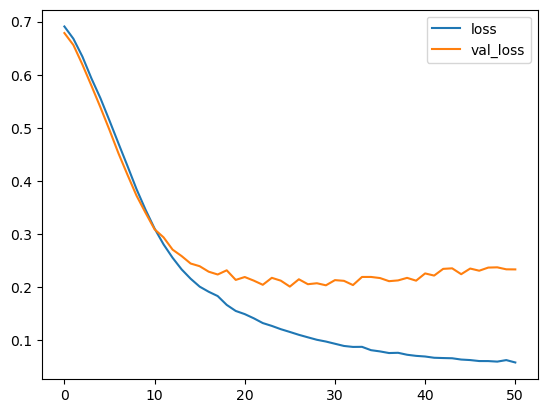

In [41]:
# notice that early stopping call was triggered, as 600 was too much
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Making use of Dropout to Reduce Errors

In [42]:
from tensorflow.keras.layers import Dropout

In [47]:
# this plot is much different that previous, as it is flatening
# now we need to add dropout layers, to turn off some neurons randomly, to prevent rise

# lets use tensorflow keras callbacks, to stop training before going out of hand
# lets re-define the model as fresh
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.6)) # half of neurons will be turned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.6)) # half of neurons will be turned off

# for binary classification the last activation will be sigmoid
# one neuron because we outputting 1 or 0
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
model.fit(x=X_train, y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 15ms/step - loss: 0.7624 - val_loss: 0.7085
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.7270 - val_loss: 0.6921
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.7081 - val_loss: 0.6775
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6903 - val_loss: 0.6659
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6796 - val_loss: 0.6512
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6539 - val_loss: 0.6375
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6370 - val_loss: 0.6228
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6247 - val_loss: 0.6065
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6003 - val_loss: 0.5849
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6114 - val_loss: 0.5735
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.1739 - val_loss: 0.1799
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1680 - val_loss: 0.2172
Epoch 85/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1732 - val_loss: 0.2545
Epoch 86/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1803 - val_loss: 0.2250
Epoch 87/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1761 - val_loss: 0.1920
Epoch 88/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1540 - val_loss: 0.2198
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1378 - val_loss: 0.2256
Epoch 90/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1366 - val_loss: 0.2105
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1376 - val_loss: 0.2166
Epoch 92/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1451 - val_loss: 0.2111
Epoch 93/600


In [49]:
# notice it ran a little bit longer than the previous, which is good
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

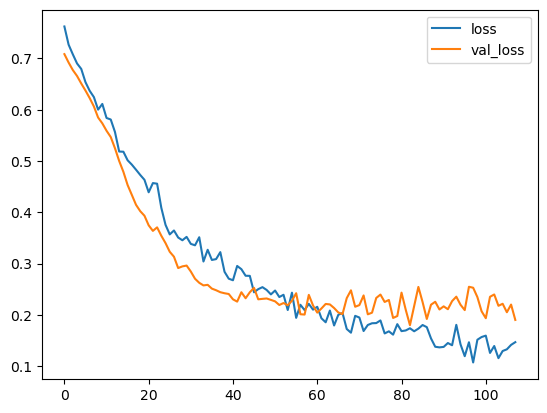

In [50]:
model_loss.plot()

In [61]:
# now this is a much better graph than all the previous

# make predictions on the test set
predictions = model.predict(X_test)

# convert predictions into binary labels using a threshold of 0.5
predicted_labels = np.where(predictions > 0.5, 1, 0)

6/6 [==============================] - 0s 2ms/step


In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predicted_labels))
print(confusion_matrix(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        66
           1       0.98      0.91      0.95       105

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

[[64  2]
 [ 9 96]]


### This concludes this project for now!